In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/fixedtilt'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/fixedtilt


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Darwin 21.6.0
Python version  3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
Pandas version  2.0.3
bifacial_radiance version  0.4.2+164.ge460768.dirty
pyplot  3.7.2


In [4]:
simulationname = 'fixedtilt-groundscan'

# Location:
lat = 39.7555
lon = -105.2211

# Scene Parameters:
azimuth_ang=90
tilt=10

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 5.7
albedo = 0.2
azimuth = 90
clearance_height = 0.2
nMods = 20 
nRows = 3

sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/fixedtilt
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json
Pre-existing .rad file objects/PVmod.rad will be overwritten



In [7]:
#Valid options: mm_dd, mm_dd_HH, mm_dd_HHMM, YYYY-mm-dd_HHMM
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-21_12', endtime='2021-06-21_13')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs/metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
demo.gendaylit(timeindex=0)  

'skies/sky2_39.74_-105.18_2021-06-21_1200.rad'

In [9]:
scene = demo.makeScene(module,sceneDict)

In [10]:
octfile = demo.makeOct()

Created fixedtilt-groundscan.oct


In [11]:
analysis = br.AnalysisObj(octfile, demo.name)

In [12]:
sensorsgroundvalues = np.array([2, 3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])

In [13]:
results = []

for i, sensorsground in enumerate(sensorsgroundvalues):
    wm2 = []
    print(f"sensorsground: {sensorsground}")
    frontscan, backscan, groundscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy, sensorsground=sensorsground)
    ground, back = analysis.analysis(octfile, "groundscan" + str(sensorsground), groundscan, backscan)
    print(ground)
    for i, x in enumerate(ground['x']):
        if x >= 1 and x <= pitch-1:
            wm2.append(ground['Wm2'])
    results.append(np.mean(wm2))
    print("")

sensorsground: 2
Linescan in process: groundscan2_Row2_Module10_Front
Linescan in process: groundscan2_Row2_Module10_Back
Saved: results/irr_groundscan2_Row2_Module10.csv
{'Wm2': [16.85065, 16.44742], 'x': [0.0, 5.7], 'y': [0.0, 3.490243e-16], 'z': [0.05, 0.05], 'r': [16.85065, 16.44742], 'g': [16.85065, 16.44742], 'b': [16.85065, 16.44742], 'mattype': ['groundplane', 'groundplane'], 'title': 'groundscan2_Row2_Module10_Front'}

sensorsground: 3
Linescan in process: groundscan3_Row2_Module10_Front


/Users/storopov/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/storopov/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Linescan in process: groundscan3_Row2_Module10_Back
Saved: results/irr_groundscan3_Row2_Module10_Front.csv
Saved: results/irr_groundscan3_Row2_Module10_Back.csv
{'Wm2': [16.8023, 959.0787, 17.17004], 'x': [0.0, 2.85, 5.7], 'y': [0.0, 1.745122e-16, 3.490243e-16], 'z': [0.05, 0.05, 0.05], 'r': [16.8023, 959.0787, 17.17004], 'g': [16.8023, 959.0787, 17.17004], 'b': [16.8023, 959.0787, 17.17004], 'mattype': ['groundplane', 'groundplane', 'groundplane'], 'title': 'groundscan3_Row2_Module10_Front'}

sensorsground: 5
Linescan in process: groundscan5_Row2_Module10_Front
Linescan in process: groundscan5_Row2_Module10_Back
Saved: results/irr_groundscan5_Row2_Module10_Front.csv
Saved: results/irr_groundscan5_Row2_Module10_Back.csv
{'Wm2': [16.9594, 959.4842, 959.3807, 954.3835, 17.05674], 'x': [0.0, 1.425, 2.85, 4.275, 5.7], 'y': [0.0, 8.725608e-17, 1.745122e-16, 2.617683e-16, 3.490243e-16], 'z': [0.05, 0.05, 0.05, 0.05, 0.05], 'r': [16.9594, 959.4842, 959.3807, 954.3835, 17.05674], 'g': [16.9594

Linescan in process: groundscan150_Row2_Module10_Back
Saved: results/irr_groundscan150_Row2_Module10_Front.csv
Saved: results/irr_groundscan150_Row2_Module10_Back.csv
{'Wm2': [16.40464, 16.00529, 15.605939999999999, 17.14828, 17.80718, 18.46607, 20.61401, 21.62249, 22.63097, 33.20999, 34.8103, 36.41061, 75.3223, 881.8838, 885.5668, 927.4113000000001, 933.4639000000001, 939.5165000000001, 945.6727, 948.0413, 950.4098, 952.2962000000001, 952.9182999999999, 953.5404, 954.1625, 954.7845000000001, 956.714, 956.6904, 956.6669, 956.6433000000001, 956.6198, 956.5962, 956.5726, 956.5490999999998, 956.5255000000001, 956.502, 959.0859, 959.1185, 959.1511999999999, 959.1839999999999, 959.2167, 959.2494, 959.2821, 959.3148, 959.3475, 959.3802, 959.413, 959.4456999999999, 959.4103, 959.4141, 959.4178, 959.4216, 959.4254, 959.4291, 959.4329000000001, 959.4366, 959.4404, 959.4441, 959.4479, 959.4516, 959.4554000000002, 959.4591, 959.4629, 959.4667, 959.4704, 959.4741, 959.4779, 959.4816, 959.4854, 959

Linescan in process: groundscan200_Row2_Module10_Back
Saved: results/irr_groundscan200_Row2_Module10_Front.csv
Saved: results/irr_groundscan200_Row2_Module10_Back.csv
{'Wm2': [16.84845, 16.62831, 16.40818, 16.90384, 17.12452, 17.34519, 18.00081, 18.64781, 19.29481, 22.46939, 23.29038, 24.111370000000004, 32.9548, 34.13796, 35.32112, 59.13581, 61.29837, 866.3394, 908.4011999999999, 912.2685, 916.1357000000002, 933.272, 938.0390000000001, 942.8061000000001, 945.2842, 947.2504, 949.2167, 951.1829000000001, 951.7431, 952.2253, 952.7076000000001, 953.1899, 953.6722, 954.1545, 956.3813, 956.436, 956.4907, 956.5453000000001, 956.6, 956.6546, 956.7091999999999, 956.7639, 956.8186, 956.8732, 956.9279, 956.9825, 957.0372000000001, 957.0918, 959.0009999999999, 959.0231, 959.0450999999999, 959.0672, 959.0893, 959.1113, 959.1334, 959.1555, 959.1776, 959.1997, 959.2217, 959.2437999999999, 959.2659, 959.288, 959.3101, 959.3322, 959.3542000000001, 959.3763, 959.1541000000001, 959.1546, 959.1551, 959.1

Linescan in process: groundscan250_Row2_Module10_Back
Saved: results/irr_groundscan250_Row2_Module10_Front.csv
Saved: results/irr_groundscan250_Row2_Module10_Back.csv
{'Wm2': [16.85184, 16.71121, 16.57057, 16.42994, 16.73761, 16.94289, 17.14816, 17.35344, 18.45169, 18.99052, 19.52934, 20.06817, 23.576720000000005, 24.26433, 24.95195, 25.639570000000003, 37.40916, 38.48443, 39.55971, 40.63498, 74.40944, 879.467, 881.6462, 883.8254000000001, 920.6408, 923.9041000000001, 927.1673999999999, 930.4306, 939.1991000000002, 941.7914999999999, 944.3839000000002, 946.9762999999999, 949.5687000000001, 949.8601, 950.5314, 951.2026, 951.8738, 952.5450999999999, 953.2163, 954.0645, 954.2247000000001, 954.3849, 954.545, 954.7053, 954.8654, 955.0256, 955.1857999999999, 955.3458999999999, 955.5062000000001, 955.6663, 955.8265, 955.9867, 958.9225, 958.9282, 958.9339, 958.9396, 958.9453, 958.9509000000002, 958.9566, 958.9623, 958.968, 958.9735999999999, 958.9794, 958.985, 958.9907, 958.9964, 959.0021, 959

Linescan in process: groundscan300_Row2_Module10_Back
Saved: results/irr_groundscan300_Row2_Module10_Front.csv
Saved: results/irr_groundscan300_Row2_Module10_Back.csv
{'Wm2': [16.90461, 16.70306, 16.5015, 16.29995, 16.09839, 15.89684, 16.85285, 17.17915, 17.50545, 17.83175, 18.15805, 19.47257, 19.94657, 20.42056, 20.89455, 21.36854, 27.14834, 27.808270000000004, 28.4682, 29.12813, 29.78806, 47.44398, 48.58635, 49.72872, 50.87109, 854.8919, 899.302, 901.6534, 904.0048, 906.3561999999998, 908.7076000000001, 931.3386, 934.3613, 937.3840999999999, 940.4069, 943.4297, 944.5577, 945.9338000000001, 947.3098999999999, 948.686, 950.0621, 951.4382, 951.5625999999999, 951.8657, 952.1688, 952.4719, 952.775, 953.0781000000001, 953.3812000000001, 953.6843, 956.2091999999999, 956.2112000000001, 956.2131, 956.2151, 956.2171, 956.2190999999999, 956.2211000000001, 956.223, 956.225, 956.2269, 956.2289, 956.2309, 956.2328000000001, 956.2349, 956.2368, 956.2388, 956.2407, 956.2427000000001, 956.24469999999

Linescan in process: groundscan400_Row2_Module10_Back
Saved: results/irr_groundscan400_Row2_Module10_Front.csv
Saved: results/irr_groundscan400_Row2_Module10_Back.csv
{'Wm2': [16.96485, 16.90485, 16.84484, 16.78484, 16.72484, 16.66484, 16.51692, 16.60559, 16.69426, 16.78293, 16.8716, 16.96027, 18.43281, 18.76707, 19.10134, 19.43561, 19.76988, 20.10415, 23.12482, 23.54534, 23.96587, 24.386389999999995, 24.80692, 25.22744, 32.80549, 33.3952, 33.98491, 34.57462, 35.16433, 35.75404, 58.772619999999996, 59.84703, 60.92144, 864.8743, 865.9487, 867.0232, 907.687, 909.5854, 911.4838999999998, 913.3822999999999, 915.2808, 917.1792, 933.209, 935.5580999999999, 937.9072, 940.2563, 942.6055, 944.9546, 944.5095, 945.5507000000001, 946.592, 947.6331999999999, 948.6744, 949.7157000000001, 950.7569, 951.7981, 951.7096, 951.9749, 952.2401, 952.5054, 952.7706, 953.0359, 953.3011, 953.5664, 953.8317000000001, 954.0970000000001, 954.3622, 954.6275, 954.8928, 956.1295999999999, 956.1735, 956.2172999999999,

Linescan in process: groundscan500_Row2_Module10_Back
Saved: results/irr_groundscan500_Row2_Module10_Front.csv
Saved: results/irr_groundscan500_Row2_Module10_Back.csv
{'Wm2': [16.88401, 16.81326, 16.7425, 16.67174, 16.60098, 16.53022, 16.45947, 16.80382, 16.88199, 16.96016, 17.03834, 17.11651, 17.19468, 17.27286, 17.35103, 17.4292, 17.50737, 18.79953, 19.05972, 19.31992, 19.58012, 19.84032, 20.10052, 20.36071, 20.62091, 24.69345, 25.05374, 25.41404, 25.774330000000003, 26.13463, 26.494919999999997, 26.85521, 37.48735, 38.02518, 38.56301, 39.10084, 39.63867, 40.1765, 40.71432, 67.478, 68.45698, 872.3145, 873.2934, 874.2724, 875.2513, 876.2303, 912.4641, 914.0664, 915.6686999999998, 917.2710000000001, 918.8732, 920.4755, 922.0778, 934.8569000000001, 936.7023, 938.5477, 940.3930999999999, 942.2383999999998, 944.0838, 945.9292, 947.7746000000001, 944.9901, 945.6452, 946.3004, 946.9554000000002, 947.6106, 948.2657, 948.9209, 949.576, 950.2311, 950.8862, 952.0931999999999, 952.2883, 952.4834

In [14]:
results

[nan,
 331.0170133333333,
 581.452908,
 762.9905370000001,
 766.2052674999999,
 767.8041306666667,
 778.4393911999999,
 781.4900566666666,
 782.9172918500001,
 787.18404984,
 786.9877453,
 787.2070694500001,
 788.90543014]

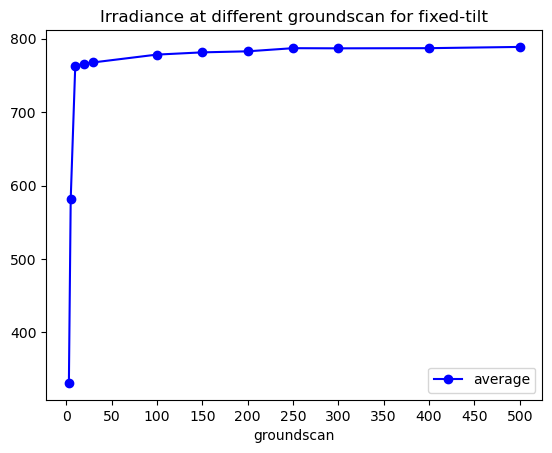

In [15]:
df = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': results
})

df.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Irradiance at different groundscan for fixed-tilt')
plt.show()